<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_H_Ordinary_Differential_Equations_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour
## MAT 421
### Module H: Ordinary Differential Equations pt. 2

### Numerical Error and Instability

### Introduction

When solving ordinary differential equations numerically, two key concerns are accuracy and stability. Accuracy describes how closely a method approximates the true solution as a function of the step size hh, often characterized by the method’s order of convergence. Stability, on the other hand, refers to whether numerical errors grow or stay bounded as the method advances in time. A stable method maintains controlled error growth, while an unstable one can produce wildly incorrect results even with a small error at the start. Some integration schemes are only stable for certain step sizes. For example, the explicit Euler method may become unstable for oscillatory problems, whereas implicit and trapezoidal methods are often more stable. These behaviors are particularly evident when solving second-order systems like the pendulum equation.

<br>

### Python Implementation

This implementation solves the pendulum equation using explicit Euler, implicit Euler, and trapezoidal methods to illustrate the stability behavior of each. The results are compared against the exact solution $cos(ωt)$, showing how different methods handle error growth over time.

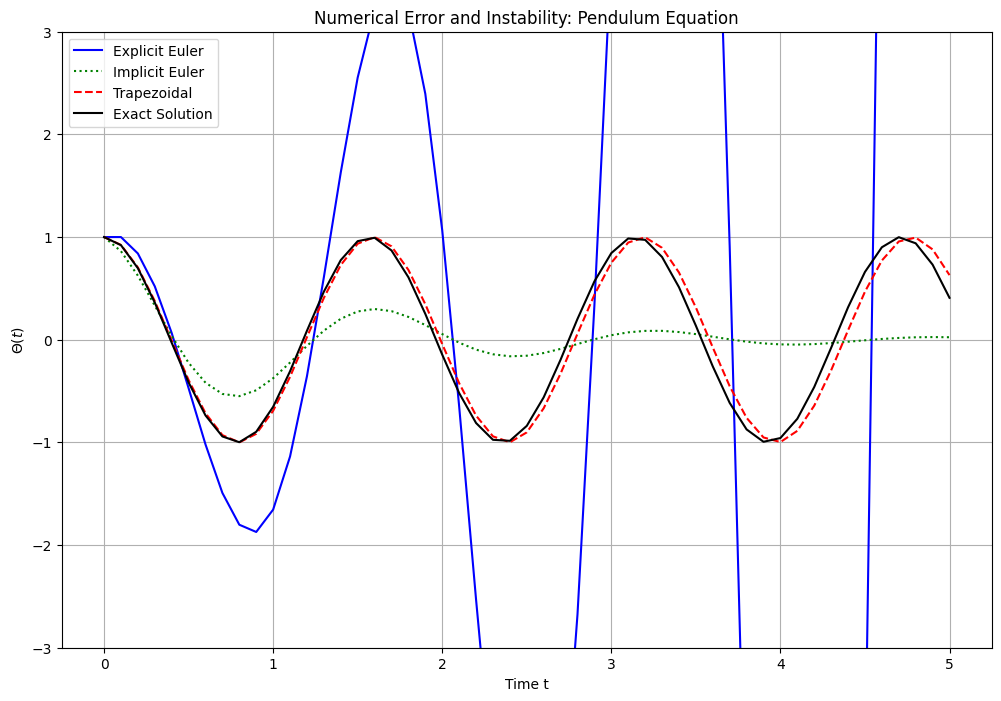

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('default')
%matplotlib inline

# Parameters
h = 0.1  # step size
t = np.arange(0, 5.1, h)  # time grid
w = 4  # angular frequency (sqrt(g/l))
s0 = np.array([[1], [0]])  # initial condition: theta(0) = 1, theta_dot(0) = 0

# Method matrices
m_e = np.array([[1, h],
                [-w**2 * h, 1]])  # Explicit Euler

m_i = inv(np.array([[1, -h],
                    [w**2 * h, 1]]))  # Implicit Euler

m_t = np.dot(inv(np.array([[1, -h/2],
                           [w**2 * h / 2, 1]])),
             np.array([[1, h/2],
                       [-w**2 * h / 2, 1]]))  # Trapezoidal

# Initialize solution arrays
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

# Apply integration schemes
for j in range(len(t) - 1):
    s_e[j + 1, :] = np.dot(m_e, s_e[j, :])
    s_i[j + 1, :] = np.dot(m_i, s_i[j, :])
    s_t[j + 1, :] = np.dot(m_t, s_t[j, :])

# Exact solution
theta_exact = np.cos(w * t)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(t, s_e[:, 0], 'b-', label='Explicit Euler')
plt.plot(t, s_i[:, 0], 'g:', label='Implicit Euler')
plt.plot(t, s_t[:, 0], 'r--', label='Trapezoidal')
plt.plot(t, theta_exact, 'k', label='Exact Solution')
plt.ylim([-3, 3])
plt.xlabel('Time t')
plt.ylabel(r'$\Theta(t)$')
plt.legend()
plt.title('Numerical Error and Instability: Pendulum Equation')
plt.grid(True)
plt.show()

### Predictor-Corrector Methods

### Introduction

Predictor-corrector methods improve the accuracy of numerical solutions to ODEs by using two steps at each iteration: a predictor step and a corrector step. The predictor uses an explicit method (e.g., Euler) to estimate the solution at the next time point. The corrector then refines this estimate using a more accurate, often implicit, formula. This two-step approach reduces local error and improves stability without the full computational cost of higher-order Runge-Kutta methods. An example is the midpoint method, which predicts the solution at a midpoint and uses that to compute a corrected value at the next step.

<br>

### Python Implementation

This implementation uses the midpoint predictor-corrector method to solve a first-order ODE. It first predicts the midpoint using Euler’s method, then corrects the result with a refined estimate based on the midpoint slope.

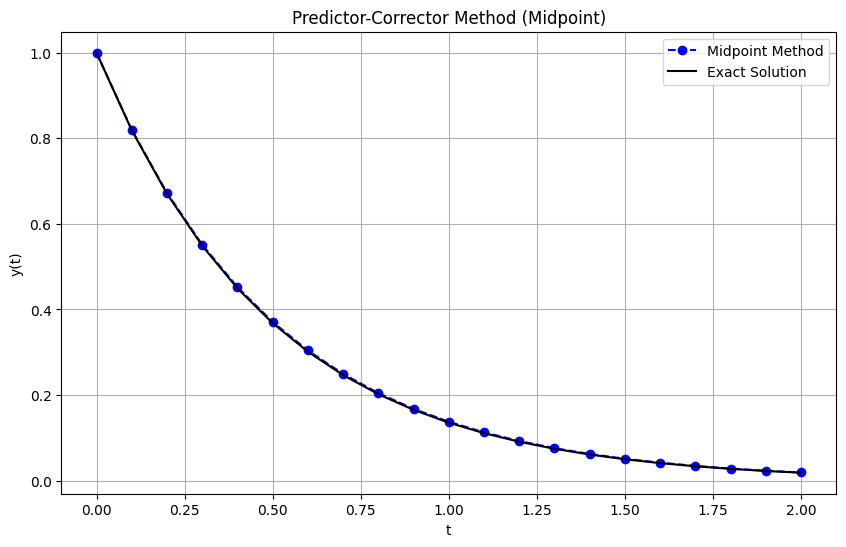

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE: dy/dt = -2y, exact solution: y(t) = e^(-2t)
def f(t, y):
    return -2 * y

# Exact solution
def exact_solution(t):
    return np.exp(-2 * t)

# Time settings
h = 0.1
t = np.arange(0, 2 + h, h)
y = np.zeros_like(t)
y[0] = 1  # Initial condition y(0) = 1

# Midpoint Predictor-Corrector method
for i in range(len(t) - 1):
    # Predictor: estimate midpoint
    y_mid = y[i] + (h / 2) * f(t[i], y[i])
    t_mid = t[i] + h / 2

    # Corrector: use slope at midpoint
    y[i + 1] = y[i] + h * f(t_mid, y_mid)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'bo--', label='Midpoint Method')
plt.plot(t, exact_solution(t), 'k-', label='Exact Solution')
plt.title('Predictor-Corrector Method (Midpoint)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()